In [43]:
import numpy as np
import tensorflow as tf
from curriculum_learning.models.classifier_model import ClassifierModel
from curriculum_learning import utils
import yaml
from sklearn.model_selection import train_test_split
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [50]:
with open("models_hyperparameters.yaml", "r") as stream:
    models_hyperparameters = yaml.safe_load(stream)
    
N_EPOCHS = 50
BATCH_SIZE = 512

loss = tf.keras.losses.SparseCategoricalCrossentropy()

In [51]:
ds_1 = tfds.load("stl10", split="train", as_supervised=True, shuffle_files=False)
ds_2 = tfds.load("stl10", split="test", as_supervised=True, shuffle_files=False)

x = []
y = []
for x_, y_ in ds_1.as_numpy_iterator():
    x.append(x_)
    y.append(y_)
for x_, y_ in ds_2.as_numpy_iterator():
    x.append(x_)
    y.append(y_)
    
x = np.array(x, dtype=np.float32) / 255
y = np.array(y, dtype=np.float32)

2024-03-29 10:42:09.216361: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-03-29 10:42:09.950887: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [52]:
# x, y = utils.load_cifar_data("../data/cifar-10-batches-py/")
# x /= 255

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=42, stratify=y_test)

n_classes = len(np.unique(y))
train_size = x_train.shape[0]
train_size, len(x_val), len(x_test)

(9100, 1950, 1950)

In [54]:
assessment_model = ClassifierModel(output_shape=n_classes, **models_hyperparameters["assessment_model"])

assessment_model.compile(optimizer="adam", loss=loss, metrics=["accuracy"])

history = assessment_model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=N_EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 150ms/step - accuracy: 0.1557 - loss: 2.5357 - val_accuracy: 0.1662 - val_loss: 2.2273
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.2318 - loss: 2.1349 - val_accuracy: 0.2154 - val_loss: 2.2022
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.2608 - loss: 2.0380 - val_accuracy: 0.1841 - val_loss: 2.2200
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.2831 - loss: 1.9602 - val_accuracy: 0.1856 - val_loss: 2.2249
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.3066 - loss: 1.9086 - val_accuracy: 0.2164 - val_loss: 2.2151
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.3255 - loss: 1.8503 - val_accuracy: 0.1892 - val_loss: 2.2260
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.3507 - loss: 1.7808 - val_accuracy: 0.1933 - val_loss: 2.2363
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.3677 - loss: 1.7554 - val_accuracy: 0.1738 - 

In [56]:
assessment_model.evaluate(x_test, y_test)

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5573 - loss: 1.2289


[1.1985386610031128, 0.5651282072067261]

In [57]:
assessment_model.save_weights('../models/assessment_model.weights.h5')

In [58]:
y_pred = assessment_model.predict(x_train)

285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [59]:
ls = tf.keras.losses.sparse_categorical_crossentropy(y_train, y_pred)

In [60]:
np.argsort(ls)[:3], np.argsort(ls)[-3:]

(array([ 960, 3836, 4942]), array([7188, 3327, 6510]))

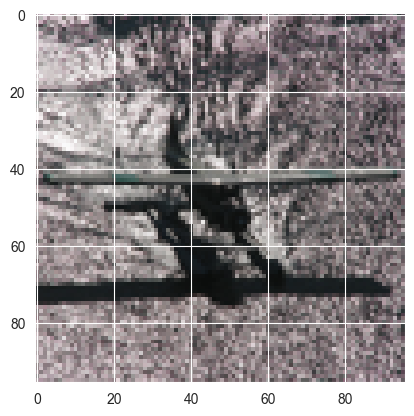

In [63]:
plt.imshow(x_train[6510])

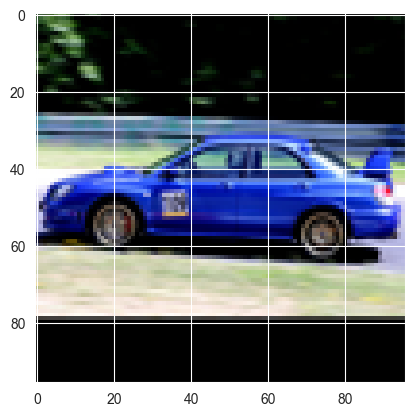

In [62]:
plt.imshow(x_train[960])